In [14]:
import numpy as np
import data1D
from reservoir import Reservoir
from sklearn.model_selection import GridSearchCV

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
parallel_runs = 1
forget = 100
n_testing_states = 200
b = Reservoir(n_res=2000, res_scale=None, res_encoding=None, res_enc_param=np.pi,
              input_scale=None, input_encoding=None,
              random_projection='simulation', weights_type='gaussian',
              activation_fun='tanh', activation_param=None,
              parallel_runs=parallel_runs,  bias_scale=None, leak_rate=None,
              pred_horizon=1, rec_pred_steps=200, forget = forget, n_testing_states = n_testing_states,
              train_method='ridge', train_param=10, verbose=0, gridsearch=True,
              scale_input_MinMax = (-1, 1), scale_res_MinMax = None, scale_output_MinMax = (-1, 1)
             )

In [17]:
params = [
  {'res_scale': np.linspace(.1, 1, 10),
   'input_scale': np.linspace(0.2, 1, 5),
   'bias_scale': np.linspace(0.2, 1, 5),
   'leak_rate': np.linspace(0, 0.8, 5),
   'activation_param': np.linspace(1, 11, 6),
  }
]

In [ ]:
ctanh = GridSearchCV(estimator=b, param_grid=params, return_train_score=True, cv=3, verbose=2)
n_sequence = 1
spatial_points = 65
lyap_exp = 0.0461
# ks_data, xx, tt = data1D.kuramoto_sivashinsky_from_dataset(sequence_length=3000, n_sequence=n_sequence, spatial_points=spatial_points)
ks_data, xx, tt = data1D.kuramoto_sivashinsky_from_dataset(sequence_length=4000, n_sequence=n_sequence)

input_shape=ks_data.shape
input_data = ks_data.reshape((ks_data.shape[1], ks_data.shape[0], ks_data.shape[2]))
ctanh.fit(input_data)

print(ctanh.best_params_)

Fitting 3 folds for each of 7500 candidates, totalling 22500 fits
[CV] activation_param=1.0, bias_scale=0.2, input_scale=0.2, leak_rate=0.0, res_scale=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
np.save('gridsearch_result', ctanh.cv_results_)

In [21]:
ctanh.best_score_

0.38454848990980517

In [24]:
ctanh.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation_param', 'param_bias_scale', 'param_input_scale', 'param_leak_rate', 'param_res_scale', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [48]:
test_scr = ctanh.cv_results_['mean_test_score']
test_scr_max_idx = np.where(train_scr==max(train_scr))
test_scr_max = train_scr[train_scr_max_idx]

train_scr = ctanh.cv_results_['mean_train_score'][test_scr_max_idx]

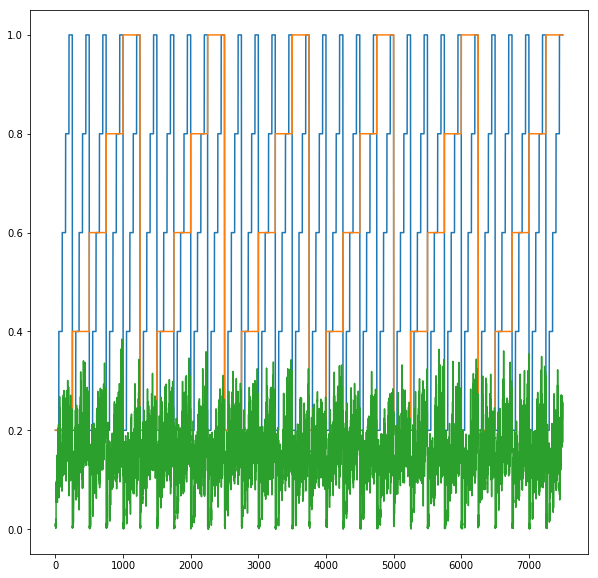

In [67]:
import matplotlib.pyplot as plt

plt.figure(2,figsize=(10,10))
plt.plot(np.array(ctanh.cv_results_['param_input_scale'])[:])
plt.plot(np.array(ctanh.cv_results_['param_bias_scale']))
plt.plot(ctanh.cv_results_['mean_test_score'])